In [82]:
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs



In [ ]:
data = pd.read_csv(r'data_cleaned.csv')

In [83]:
random_state_num = 0
data.shape

(1700, 18)

In [84]:
data.dtypes

country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [85]:
data.head(10)

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1.909812e+06,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,3.309358e+07,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,1.728400e+07,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7.798899e+06,1.134999,5.131676e+06
5,BGD,1991,2585.7,0.004491,154.496130,116.511476,15940.449,0.147913,196.135682,9.443704,1.537922,3.095744e+10,300.0,137.9,2.359199,1.077687e+08,4.260207,2.174773e+07
6,BGR,1991,3990.0,0.510803,367.387480,2560.054449,59706.094,6.916832,992.618530,13.789261,2.416870,1.094355e+10,1620.0,22.3,-0.991363,8.632000e+06,-0.570562,5.755818e+06
7,BOL,1991,1358.0,0.973189,124.898118,394.957523,5779.192,0.848156,268.213775,25.655982,8.583622,5.343259e+09,760.0,116.7,2.306643,6.813834e+06,3.664292,3.840277e+06
8,BRA,1991,1850.6,0.270783,131.112804,939.256647,219330.604,1.441571,201.231977,35.137914,10.994541,4.073378e+11,2870.0,57.1,1.654581,1.521469e+08,2.453520,1.147188e+08
9,CAN,1991,2580.7,0.480500,283.945526,7388.563674,449053.486,15.939889,612.576462,39.968292,6.016160,5.982081e+11,20420.0,8.0,1.360506,2.817168e+07,1.647301,2.164149e+07


In [86]:
data.describe()

,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


In [87]:
data = data[data['country']!='ARE']

# print shape after removing the outliers
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [88]:
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

In [89]:
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.75,
                                                                            random_state=random_state_num)

In [90]:
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[2 1 1 1 1 1 3 1 1]
Chosen important features:
['fdi_perc_gdp', 'gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']


In [91]:
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(421, 9)
Training subset array shape after the recursive feature elimination:
(421, 7)
Test subset array shape after the recursive feature elimination:
(1265, 7)


In [92]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [93]:
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

rf_tuner = RandomForestRegressor(random_state=random_state_num)

nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [94]:
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

C:\Users\cloner\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cloner\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cloner\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\cloner\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\cloner\anaconda\Lib\site-packages\s

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [99]:
rf_best_model = rf_model.best_estimator_

In [100]:
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.943
Standard deviation of the R2 score over all folds = 0.017
R2 score for each fold:
Fold  1    0.952
Fold  2    0.941
Fold  3    0.959
Fold  4    0.916
Fold  5    0.960
Fold  6    0.956
Fold  7    0.925
Fold  8    0.964
Fold  9    0.920
Fold 10    0.941


In [101]:
predictions = rf_best_model.predict(features_test_reduced)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9536782485444836
Mean Squared Error: MSE=
0.8950467678246159
Root Mean Squared Error: RMSE=
0.9460691136616901


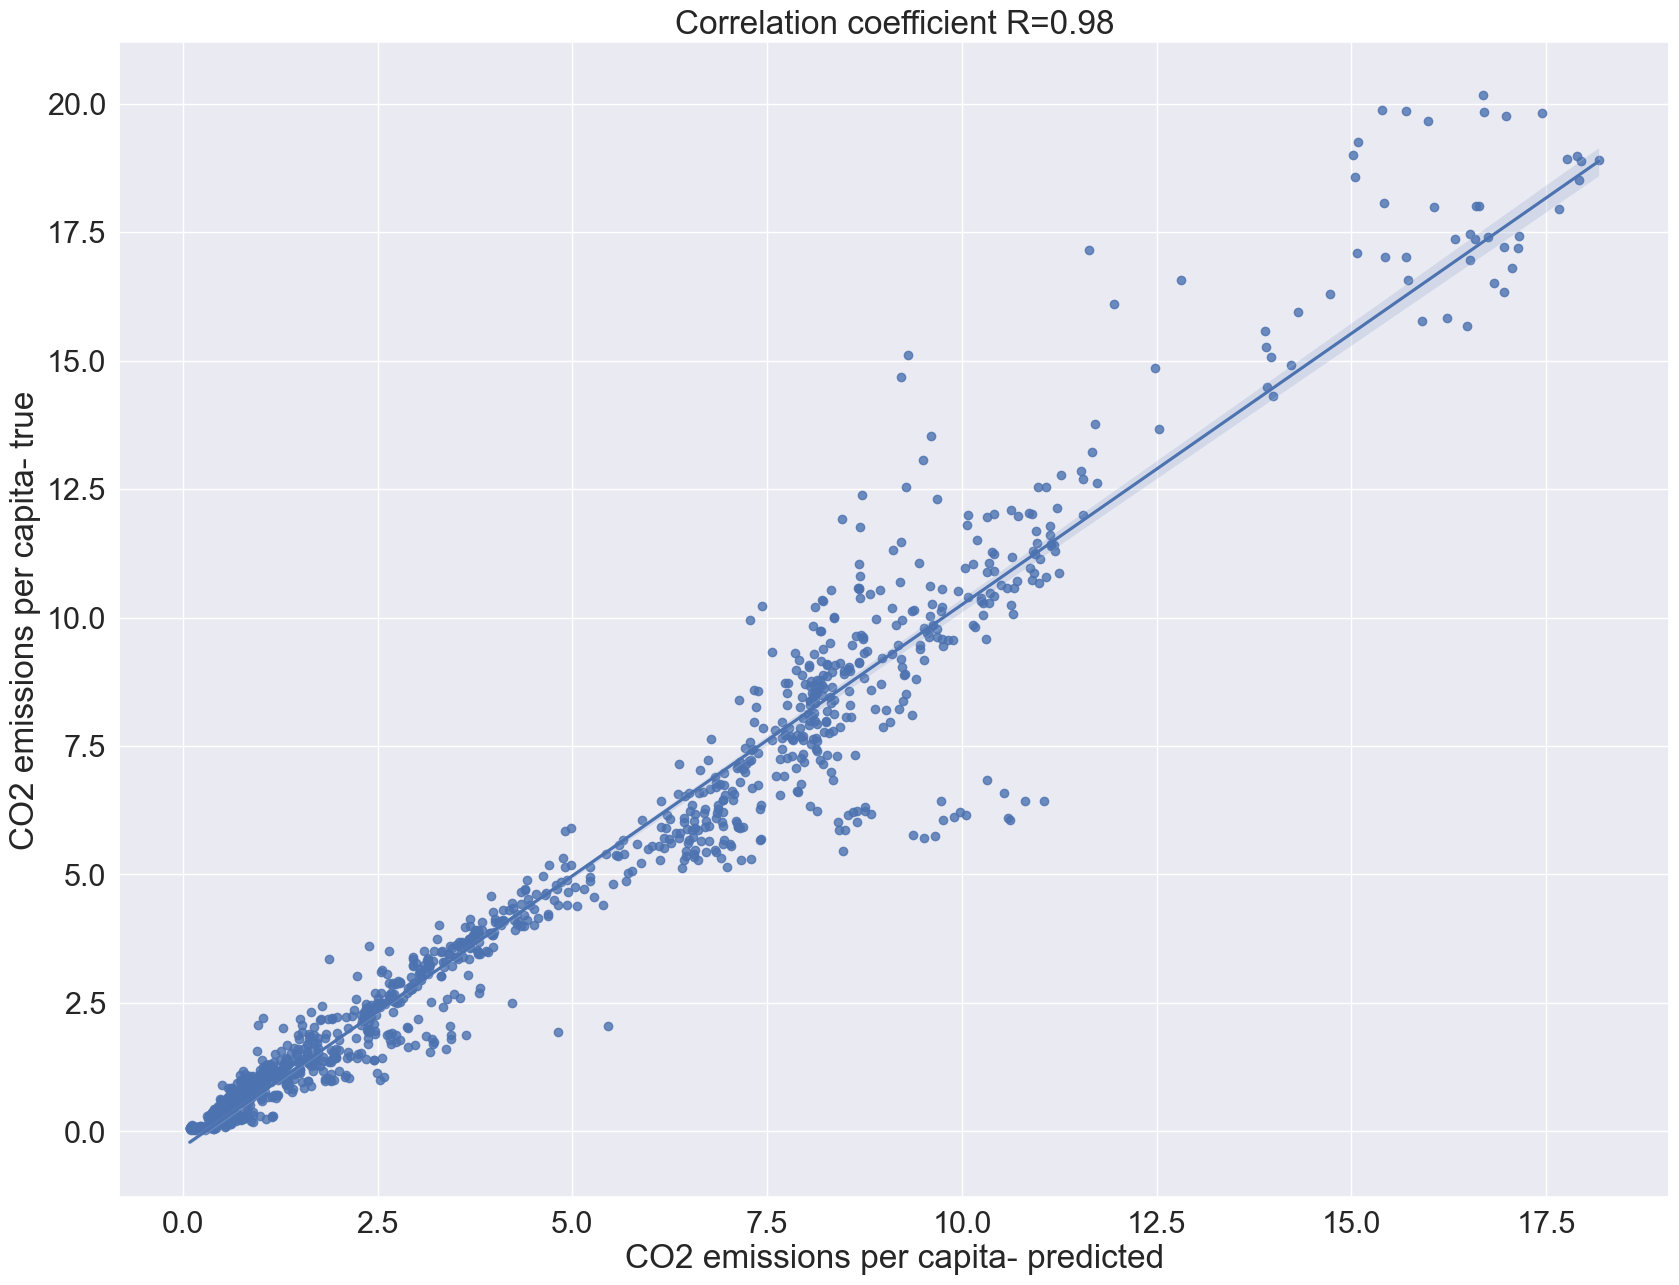

In [102]:
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita- predicted")
plt.ylabel("CO2 emissions per capita- true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()